In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns

# Part-1: data Exploration and Pre-processing

- 1) Load the given dataset 
-2) Fill Null value of experience column with the value 0 
-3) Replace the Null values of the column test score with mean value 
-4) Display a scatter plot between experience and Salary 
-5) Display a scatter plot between test score and Salary 
-6) Display a scatter plot between interview score and Salary 
-7) Display bar plot for experience

## 1) Load the given dataset

In [2]:


df = pd.read_csv(r'C:\Users\123\Downloads\jainik\data science\Project\Python\Python Linear Regression Project 1_Employee Salary Analysis\0.1\0.1.csv')

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      float64
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 384.0 bytes


## 2) Fill Null value of experience column with the value 0

In [4]:

df['experience'].fillna(0,inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [6]:
# i use whole number because it is a test score and it would be in whole number
mean=int(df['test_score(out of 10)'].mean())

## 3) Replace the Null values of the column test score with mean value

In [7]:

df['test_score(out of 10)'].fillna(mean,inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


## 4) Display a scatter plot between experience and Salary

<AxesSubplot:xlabel='experience', ylabel='salary($)'>

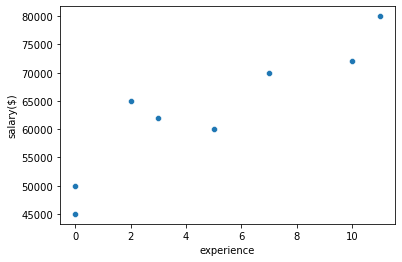

In [8]:

sns.scatterplot(data=df,x='experience',y='salary($)')

## 5) Display a scatter plot between test score and Salary

<AxesSubplot:xlabel='test_score(out of 10)', ylabel='salary($)'>

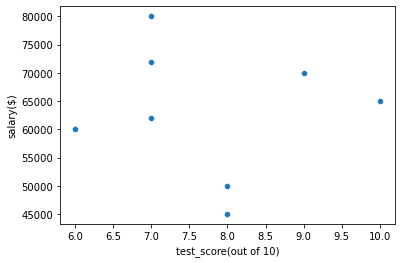

In [9]:

sns.scatterplot(data=df,x='test_score(out of 10)',y='salary($)')

## 6) Display a scatter plot between interview score and Salary


<AxesSubplot:xlabel='interview_score(out of 10)', ylabel='salary($)'>

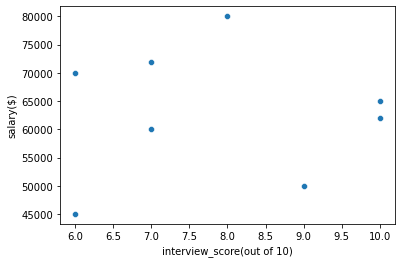

In [10]:

sns.scatterplot(data=df,x='interview_score(out of 10)',y='salary($)')


## 7) Display bar plot for experience 

<AxesSubplot:xlabel='experience', ylabel='count'>

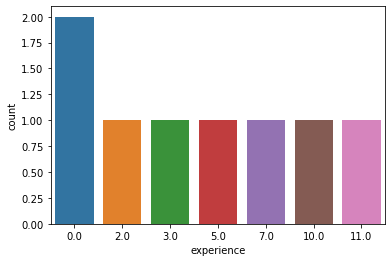

In [11]:


sns.countplot(data=df,x='experience')


----

# Part-2: Working with Model 

- 1) Separate feature data from target data 
- 2) Create a Linear regression model between Features and target data
- 3) Display the test score and training score 
- 4) Extract slope and intercept value from the model 
- 5) Display Mean Squared Error 
- 6) Display Mean Absolute Error 
-  7) Display Root mean Squared error 
-8) Display R2 score

In [12]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


## 1) Separate feature data from target data


In [12]:

target = df['salary($)']
target

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [13]:
feature = df[['experience','test_score(out of 10)','interview_score(out of 10)']]
feature

,experience,test_score(out of 10),interview_score(out of 10)
0,0.00,8.00,9
1,0.00,8.00,6
2,5.00,6.00,7
3,2.00,10.00,10
4,7.00,9.00,6
5,3.00,7.00,10
6,10.00,7.00,7
7,11.00,7.00,8


## 2) Create a Linear regression model between Features and target data


In [17]:

liner_model = LinearRegression()

In [18]:
liner_model.fit(feature,target)

LinearRegression()

In [19]:
predict = liner_model.predict(feature)

In [20]:
predict

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

## 3) Display the test score and training score


In [21]:

rmse = mean_squared_error(target,predict)
r2 = r2_score(target,predict)

print('Root Mean Squared Error(test score) :',rmse)
print('r2 Score(training score) :',r2)

Root Mean Squared Error(test score) : 2660640.9097884092
r2 Score(training score) : 0.9770139014273139


## 4) Extract slope and intercept value from the model

In [20]:
print('Slope :',liner_model.coef_)
print('Intercept :',liner_model.intercept_)

Slope : [2922.26901502 2221.30909959 2147.48256637]
Intercept : 14992.65144669314


##  5) Display Mean Squared Error

In [21]:
print('Root Mean Squared Error(test score) :',rmse)

Root Mean Squared Error(test score) : 2660640.9097884092


## 6) Display Mean Absolute Error

In [22]:
mae = mean_absolute_error(target,predict)
print('Mean Absolute Error :',mae)

Mean Absolute Error : 1383.8425602291509


- ## 7) Display Root mean Squared error

In [24]:
rmse = mean_squared_error(target,predict)
print('Root Mean Squared Error(test score) :',rmse)

Root Mean Squared Error(test score) : 2660640.9097884092


- ## 8) Display R2 score

In [25]:
r2 = r2_score(target,predict)

print('r2 Score(training score) :',r2)

r2 Score(training score) : 0.9770139014273139
